In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crashes_data = pd.read_csv('Crashes_in_DC.csv', low_memory=False)
crashes_data.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-77.035760,38.931394,84408359,25165944,14159567,2014-10-16T05:00:00.000Z,11068902,1573.378,0.00000,9732.0,...,11070392,PINE ST NW,17.786350,Southeast,NaN,NaN,NaN,NaN,NaN,NaN
1,-77.048800,38.908240,84408360,26651327,10176429,2010-12-08T05:00:00.000Z,11002202,1465.478,0.00000,13058.0,...,11065842,O ST NW,36.825488,South,NaN,NaN,NaN,NaN,NaN,NaN
2,-77.016451,38.904792,84408361,27612522,18040153,2018-03-12T14:03:30.000Z,11064672,701.879,10.34334,7453.0,...,11000402,4TH ST NW,27.518016,Southwest,NaN,NaN,38.928240,-77.019329,NaN,NaN
3,-76.983641,38.864912,84408362,24641662,13085861,2013-06-23T05:00:00.000Z,13001502,1527.658,0.00000,6700.0,...,13088462,V ST SE,27.044306,North,NaN,NaN,38.864876,-76.983481,NaN,NaN
4,-76.984066,38.884111,84408363,27263103,17051952,2017-03-31T03:53:04.000Z,13026912,2420.722,0.00000,7627.0,...,13001502,15TH ST SE,38.672600,West,NaN,NaN,38.883957,-76.984064,401337.5,135121.19


In [3]:
crash_details = pd.read_csv('Crash_Details_Table.csv', low_memory=False)
crash_details.head()

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,173581893,27885549,18209160,87847959,Driver,55,N,N,N,4306306,Passenger Car/automobile,N,DC,N,N
1,173581894,27885844,18209454,87847985,Driver,0,N,N,N,4306270,Passenger Car/automobile,Y,DC,N,N
2,173581895,27885926,18209500,87847998,Driver,25,N,N,Y,4306319,Passenger Car/automobile,Y,MD,N,N
3,173581896,27886042,18209514,87848009,Driver,38,N,N,N,4306328,Passenger Car/automobile,Y,MD,N,N
4,173581897,27885046,18209064,87848061,Driver,49,N,N,N,4306267,Passenger Car/automobile,N,MD,N,N


In [4]:
merged_data = crashes_data.merge(crash_details, on='CRIMEID', how='left')
merged_data.columns


Index(['X', 'Y', 'OBJECTID_x', 'CRIMEID', 'CCN_x', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE',
       'MPDGEOX', 

In [129]:
fatalities_injuries_filter_all_columns = merged_data[(merged_data['FATAL_BICYCLIST']!=0) | 
                                                     (merged_data['FATAL_DRIVER']!=0) |
                                                     (merged_data['FATAL_PEDESTRIAN']!=0) | 
                                                     (merged_data['MAJORINJURIES_BICYCLIST']!=0) |
                                                     (merged_data['MAJORINJURIES_DRIVER']!=0) |
                                                     (merged_data['MAJORINJURIES_PEDESTRIAN']!=0) |
                                                     (merged_data['MINORINJURIES_BICYCLIST']!=0) |
                                                     (merged_data['MINORINJURIES_DRIVER']!=0) |
                                                     (merged_data['MINORINJURIES_PEDESTRIAN']!=0)]
fatalities_injuries_filter_all_columns.head()
  
fatalities_injuries_filter = fatalities_injuries_filter_all_columns[[
     'REPORTDATE', 'FATAL_BICYCLIST', 'FATAL_DRIVER', 'FATAL_PEDESTRIAN', 'FATAL', 'MAJORINJURY', 'MINORINJURY', 
     'MAJORINJURIES_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_BICYCLIST', 
     'MINORINJURIES_DRIVER', 'MINORINJURIES_PEDESTRIAN']]

fatalities_injuries_filter.head()

,REPORTDATE,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FATAL,MAJORINJURY,MINORINJURY,MAJORINJURIES_BICYCLIST,MAJORINJURIES_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_BICYCLIST,MINORINJURIES_DRIVER,MINORINJURIES_PEDESTRIAN
11,2017-03-31T03:53:04.000Z,0,0,0,N,N,N,0,0,0,0,0,1
12,2017-03-31T03:53:04.000Z,0,0,0,N,N,Y,0,0,0,0,0,1
22,2013-11-09T05:00:00.000Z,0,0,0,N,N,Y,0,0,0,0,1,0
23,2013-11-09T05:00:00.000Z,0,0,0,N,N,N,0,0,0,0,1,0
45,2014-10-16T05:00:00.000Z,0,0,0,N,N,N,0,0,0,0,1,0


#### Data Indicators FATAL and MAJORINJURY not correctly indicating whether fatalities or Major Injuries exist

In [130]:
num = len(merged_data[(merged_data['FATAL']=='Y') & (merged_data['FATAL_DRIVER']==0) & (merged_data['FATAL_BICYCLIST']==0) &
                                                    (merged_data['FATAL_PEDESTRIAN']==0)])
print(f"Number of rows having FATAL = 'Y', but no fatalities noted: {num}")

Number of rows having FATAL = 'Y', but no fatalities noted: 1


In [131]:
num = len(merged_data[(merged_data['FATAL']=='N') & ((merged_data['FATAL_DRIVER']!=0) | (merged_data['FATAL_BICYCLIST']!=0) &
                                                     (merged_data['FATAL_PEDESTRIAN']!=0))])
print(f"Number of rows having FATAL = 'N' and actual fatalities noted: {num}")

Number of rows having FATAL = 'N' and actual fatalities noted: 249


In [132]:
num = (len(merged_data[(merged_data['MAJORINJURY']=='N') & ((merged_data['MAJORINJURIES_DRIVER']!=0) | 
                                                            (merged_data['MAJORINJURIES_BICYCLIST']!=0) &
                                                            (merged_data['MAJORINJURIES_PEDESTRIAN']!=0))]))
print(f"Number of rows having MAJORINJURY = 'N' and actual major injuries noted: {num}")

Number of rows having MAJORINJURY = 'N' and actual major injuries noted: 23257


In [133]:
num = len(merged_data[(merged_data['MAJORINJURY']=='Y') & (merged_data['MAJORINJURIES_DRIVER']==0) & 
                                                          (merged_data['MAJORINJURIES_BICYCLIST']==0) &
                                                          (merged_data['MAJORINJURIES_PEDESTRIAN']==0)])
print(f"Number of rows having MAJORINJURY = 'Y', but no major injuries noted: {num}")

Number of rows having MAJORINJURY = 'Y', but no major injuries noted: 9


In [134]:
# Remove rows with missing REPORTDATE

print("Num Rows Prior to Cleanup: ", len(fatalities_injuries_filter['REPORTDATE']))
fatalities_injuries_filter = fatalities_injuries_filter[pd.notnull(fatalities_injuries_filter['REPORTDATE'])]
print("Num Rows After Cleanup: ", len(fatalities_injuries_filter['REPORTDATE']))

Num Rows Prior to Cleanup:  123711
Num Rows After Cleanup:  123166


2018 Sunrise / Sunset data for Washington DC taken from:
https://aa.usno.navy.mil/cgi-bin/aa_rstablew.pl?ID=AA&year=2018&task=0&state=DC&place=

Data format initially read in as lines.

In [11]:
with open("Sunrise Sunset.csv") as a:
    line = a.readlines()
    print(line)

['01  0727 1657  0714 1729  0641 1801  0553 1832  0511 1900  0445 1927  0446 1937  0509 1919  0537 1839  0604 1751  0635 1708  0707 1647\n', '02  0727 1658  0714 1730  0639 1802  0552 1832  0509 1901  0444 1928  0447 1937  0510 1918  0538 1837  0605 1750  0636 1707  0708 1646\n', '03  0727 1658  0713 1732  0638 1803  0550 1833  0508 1902  0444 1929  0447 1937  0511 1917  0539 1836  0606 1748  0637 1706  0709 1646\n', '04  0727 1659  0712 1733  0637 1804  0549 1834  0507 1903  0444 1929  0448 1937  0512 1916  0540 1834  0607 1746  0638 1705  0710 1646\n', '05  0727 1700  0711 1734  0635 1805  0547 1835  0506 1904  0444 1930  0449 1937  0513 1915  0540 1833  0608 1745  0639 1704  0711 1646\n', '06  0727 1701  0710 1735  0634 1806  0545 1836  0505 1905  0443 1931  0449 1936  0513 1914  0541 1831  0609 1743  0641 1702  0712 1646\n', '07  0727 1702  0709 1736  0632 1807  0544 1837  0504 1906  0443 1931  0450 1936  0514 1913  0542 1829  0609 1742  0642 1701  0713 1646\n', '08  0727 1703  070

Data Converted to dictionary

In [12]:
dict={}

with open("Sunrise Sunset.csv") as a:
    line = a.readlines()
    i=1
    
    for sunrise_sunset_pair in line:     
        # Keys become days of the month (1 - 31)
        # Values are sunrise, sunset times for each month (Jan - Dec with 01, 02, etc. as the first element)
        dict[i]=sunrise_sunset_pair.split("  ")
        i+=1
dict        

{1: ['01',
  '0727 1657',
  '0714 1729',
  '0641 1801',
  '0553 1832',
  '0511 1900',
  '0445 1927',
  '0446 1937',
  '0509 1919',
  '0537 1839',
  '0604 1751',
  '0635 1708',
  '0707 1647\n'],
 2: ['02',
  '0727 1658',
  '0714 1730',
  '0639 1802',
  '0552 1832',
  '0509 1901',
  '0444 1928',
  '0447 1937',
  '0510 1918',
  '0538 1837',
  '0605 1750',
  '0636 1707',
  '0708 1646\n'],
 3: ['03',
  '0727 1658',
  '0713 1732',
  '0638 1803',
  '0550 1833',
  '0508 1902',
  '0444 1929',
  '0447 1937',
  '0511 1917',
  '0539 1836',
  '0606 1748',
  '0637 1706',
  '0709 1646\n'],
 4: ['04',
  '0727 1659',
  '0712 1733',
  '0637 1804',
  '0549 1834',
  '0507 1903',
  '0444 1929',
  '0448 1937',
  '0512 1916',
  '0540 1834',
  '0607 1746',
  '0638 1705',
  '0710 1646\n'],
 5: ['05',
  '0727 1700',
  '0711 1734',
  '0635 1805',
  '0547 1835',
  '0506 1904',
  '0444 1930',
  '0449 1937',
  '0513 1915',
  '0540 1833',
  '0608 1745',
  '0639 1704',
  '0711 1646\n'],
 6: ['06',
  '0727 1701',
  '0

Then, converted to dictionary with tuple sunrise/sunset pairs.

In [13]:
dict={}
day_of_month_dict={}

import csv
with open("Sunrise Sunset.csv") as a:
    line = a.readlines()
    i=1
    
    for sunrise_sunset_pair in line:   
        # Keys become days of the month (1 - 31)
        # Values are sunrise, sunset times for each month (Jan - Dec with 01, 02, etc. as the first element)
        dict[i]=sunrise_sunset_pair.split("  ")
        i+=1

    for x, y in dict.items():
        counter=0
        for month_values in y:
            counter+=1 
            try:
                sunrise, sunset = month_values.split(" ")
            except:
                sunrise = 'N/A'
                sunset = 'N/A'
                
            if counter - 1 not in day_of_month_dict:
                day_of_month_dict[counter - 1] = []
            day_of_month_dict[counter - 1].append(tuple((sunrise, sunset)))

print(day_of_month_dict)
            
sunrises_sunsets = pd.DataFrame(day_of_month_dict)
sunrises_sunsets = sunrises_sunsets.rename(columns={0:'X', 1:'January', 2:'February', 3:'March', 4:'April',
                                                    5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
                                                    10:'October', 11:'November', 12:'December'})
                                                     
                                                 
sunrises_sunsets

{0: [('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A'), ('N/A', 'N/A')], 1: [('0727', '1657'), ('0727', '1658'), ('0727', '1658'), ('0727', '1659'), ('0727', '1700'), ('0727', '1701'), ('0727', '1702'), ('0727', '1703'), ('0727', '1704'), ('0727', '1705'), ('0726', '1706'), ('0726', '1707'), ('0726', '1708'), ('0726', '1709'), ('0725', '1710'), ('0725', '1711'), ('0724', '1712'), ('0724', '1713'), ('0724', '1714'), ('0723', '1716'), ('0722', '1717'), ('0722', '1718'), ('0721', '1719'), ('0721', '1720'), ('0720', '1721'), ('0719', '1722'), ('0719', '1724'), ('0718',

,X,January,February,March,April,May,June,July,August,September,October,November,December
0,"(N/A, N/A)","(0727, 1657)","(0714, 1729)","(0641, 1801)","(0553, 1832)","(0511, 1900)","(0445, 1927)","(0446, 1937)","(0509, 1919)","(0537, 1839)","(0604, 1751)","(0635, 1708)","(0707, 1647\n)"
1,"(N/A, N/A)","(0727, 1658)","(0714, 1730)","(0639, 1802)","(0552, 1832)","(0509, 1901)","(0444, 1928)","(0447, 1937)","(0510, 1918)","(0538, 1837)","(0605, 1750)","(0636, 1707)","(0708, 1646\n)"
2,"(N/A, N/A)","(0727, 1658)","(0713, 1732)","(0638, 1803)","(0550, 1833)","(0508, 1902)","(0444, 1929)","(0447, 1937)","(0511, 1917)","(0539, 1836)","(0606, 1748)","(0637, 1706)","(0709, 1646\n)"
3,"(N/A, N/A)","(0727, 1659)","(0712, 1733)","(0637, 1804)","(0549, 1834)","(0507, 1903)","(0444, 1929)","(0448, 1937)","(0512, 1916)","(0540, 1834)","(0607, 1746)","(0638, 1705)","(0710, 1646\n)"
4,"(N/A, N/A)","(0727, 1700)","(0711, 1734)","(0635, 1805)","(0547, 1835)","(0506, 1904)","(0444, 1930)","(0449, 1937)","(0513, 1915)","(0540, 1833)","(0608, 1745)","(0639, 1704)","(0711, 1646\n)"
5,"(N/A, N/A)","(0727, 1701)","(0710, 1735)","(0634, 1806)","(0545, 1836)","(0505, 1905)","(0443, 1931)","(0449, 1936)","(0513, 1914)","(0541, 1831)","(0609, 1743)","(0641, 1702)","(0712, 1646\n)"
6,"(N/A, N/A)","(0727, 1702)","(0709, 1736)","(0632, 1807)","(0544, 1837)","(0504, 1906)","(0443, 1931)","(0450, 1936)","(0514, 1913)","(0542, 1829)","(0609, 1742)","(0642, 1701)","(0713, 1646\n)"
7,"(N/A, N/A)","(0727, 1703)","(0708, 1737)","(0631, 1808)","(0542, 1838)","(0503, 1907)","(0443, 1932)","(0450, 1936)","(0515, 1912)","(0543, 1828)","(0610, 1740)","(0643, 1701)","(0714, 1646\n)"
8,"(N/A, N/A)","(0727, 1704)","(0707, 1739)","(0629, 1809)","(0541, 1839)","(0502, 1908)","(0443, 1932)","(0451, 1936)","(0516, 1911)","(0544, 1826)","(0611, 1739)","(0644, 1700)","(0715, 1646\n)"
9,"(N/A, N/A)","(0727, 1705)","(0705, 1740)","(0628, 1810)","(0539, 1840)","(0501, 1909)","(0443, 1933)","(0452, 1935)","(0517, 1909)","(0545, 1825)","(0612, 1737)","(0645, 1659)","(0716, 1646\n)"


Website instructs to add 1 hour for daylight savings time. 2018 data.
Daylight savings time in 2018: March 11th - November 3rd.

In [14]:
# Incorporate daylight savings time change for April through October
for day, month in sunrises_sunsets.iterrows():    
    for col in range(4,11):
        if month[col][0] == "N/A":
            continue

        rise = int(month[col][0]) + 100
        set = int(month[col][1]) + 100
        
        sunrises_sunsets.iloc[day, col] = (str(rise), str(set))

# Incorporate time change for March 11th - March 31st
for i in range(10,31):
    rise = sunrises_sunsets.iloc[i, 3][0]
    updated_rise = int(rise) + 100
    
    set = sunrises_sunsets.iloc[i, 3][1]
    updated_set = int(set) + 100

    sunrises_sunsets.iloc[i, 3] = (str(updated_rise), str(updated_set))

# Incorporate time change for November 1st - November 3rd    
for i in range(0,3):
    rise = sunrises_sunsets.iloc[i, 11][0]
    updated_rise = int(rise) + 100
    
    set = sunrises_sunsets.iloc[i, 11][1]
    updated_set = int(set) + 100

    sunrises_sunsets.iloc[i, 11] = (str(updated_rise), str(updated_set))

# Remove \n from December values
for i in range(0,30):
    rise = sunrises_sunsets.iloc[i, 12][0]
    set = sunrises_sunsets.iloc[i, 12][1]
    updated_rise = rise.replace("\n","")
    updated_set = set.replace("\n","")
    
    sunrises_sunsets.iloc[i, 12] = (str(updated_rise), str(updated_set))

In [111]:
sunrises_sunsets.head()

,X,January,February,March,April,May,June,July,August,September,October,November,December
0,"(N/A, N/A)","(0727, 1657)","(0714, 1729)","(0641, 1801)","(653, 1932)","(611, 2000)","(545, 2027)","(546, 2037)","(609, 2019)","(637, 1939)","(704, 1851)","(735, 1808)","(0707, 1647)"
1,"(N/A, N/A)","(0727, 1658)","(0714, 1730)","(0639, 1802)","(652, 1932)","(609, 2001)","(544, 2028)","(547, 2037)","(610, 2018)","(638, 1937)","(705, 1850)","(736, 1807)","(0708, 1646)"
2,"(N/A, N/A)","(0727, 1658)","(0713, 1732)","(0638, 1803)","(650, 1933)","(608, 2002)","(544, 2029)","(547, 2037)","(611, 2017)","(639, 1936)","(706, 1848)","(737, 1806)","(0709, 1646)"
3,"(N/A, N/A)","(0727, 1659)","(0712, 1733)","(0637, 1804)","(649, 1934)","(607, 2003)","(544, 2029)","(548, 2037)","(612, 2016)","(640, 1934)","(707, 1846)","(0638, 1705)","(0710, 1646)"
4,"(N/A, N/A)","(0727, 1700)","(0711, 1734)","(0635, 1805)","(647, 1935)","(606, 2004)","(544, 2030)","(549, 2037)","(613, 2015)","(640, 1933)","(708, 1845)","(0639, 1704)","(0711, 1646)"


In [16]:
sunrise_list=[]
sunset_list=[]
accident_time_list = []
time_frame_list = []
time_frame_label_list = []

# REPORTDATE 2019-04-08T10:39:06.000Z

for index, column in fatalities_injuries_filter.iterrows():

    # column[0] is REPORTDATE. Break out month / day / time portions of accident report date.
    try:
        if column[0] is None:
            continue
        monthportion = int(column[0][5:7])
        dayportion = int(column[0][8:10])
        accident_time = int(column[0][11:13] + column[0][14:16])

        # Look up sunrise / sunset in sunrises_sunsets dataframe
        sunrise = int(sunrises_sunsets.iloc[dayportion - 1, monthportion][0])    
        sunrise_list.append(sunrise)
        sunset = int(sunrises_sunsets.iloc[dayportion - 1, monthportion][1])
        sunset_list.append(sunset)
        accident_time_list.append(accident_time)

        if (accident_time >= 500) & (accident_time <= sunrise):
            time_frame = "2) Before Sunrise"
            time_frame_label = "5am -> Sunrise"
        
        elif (accident_time > sunrise) & (accident_time < sunset):   
            time_frame = "3) Daytime "
            time_frame_label = "Between Sunrise and Sunset"
        
        elif (accident_time >= sunset) & (accident_time <= 2359):   
            time_frame = "4) After Sunset"
            time_frame_label = "Sunset -> 11:59pm"
    
        elif (accident_time >= 0) & (accident_time < 500):
            time_frame = "1) Middle of Night"
            time_frame_label = "Midnight -> 5am"

        time_frame_list.append(time_frame)    
        time_frame_label_list.append(time_frame_label) 
        
    except:
        print(column[0])
        
fatalities_injuries_filter['Sunrise'] = sunrise_list
fatalities_injuries_filter['Sunset'] = sunset_list
fatalities_injuries_filter['Accident Time'] = accident_time_list
fatalities_injuries_filter['Time Frame'] = time_frame_list
fatalities_injuries_filter['Time Frame Label'] = time_frame_label_list

print(fatalities_injuries_filter.head())

                  REPORTDATE  FATAL_BICYCLIST  FATAL_DRIVER  FATAL_PEDESTRIAN  \
11  2017-03-31T03:53:04.000Z                0             0                 0   
12  2017-03-31T03:53:04.000Z                0             0                 0   
22  2013-11-09T05:00:00.000Z                0             0                 0   
23  2013-11-09T05:00:00.000Z                0             0                 0   
45  2014-10-16T05:00:00.000Z                0             0                 0   

   FATAL MAJORINJURY MINORINJURY  MAJORINJURIES_BICYCLIST  \
11     N           N           N                        0   
12     N           N           Y                        0   
22     N           N           Y                        0   
23     N           N           N                        0   
45     N           N           N                        0   

    MAJORINJURIES_DRIVER  MAJORINJURIES_PEDESTRIAN  MINORINJURIES_BICYCLIST  \
11                     0                         0                 

Determine number of report dates containing accident time of 5am (0500)

In [17]:
len(fatalities_injuries_filter[fatalities_injuries_filter['FATAL_DRIVER']!=0])

413

In [18]:
fatalities_injuries_filter[(fatalities_injuries_filter['FATAL_DRIVER']!=0) & 
                           (fatalities_injuries_filter['Accident Time']==500)].count()

REPORTDATE                  332
FATAL_BICYCLIST             332
FATAL_DRIVER                332
FATAL_PEDESTRIAN            332
FATAL                       332
MAJORINJURY                 332
MINORINJURY                 332
MAJORINJURIES_BICYCLIST     332
MAJORINJURIES_DRIVER        332
MAJORINJURIES_PEDESTRIAN    332
MINORINJURIES_BICYCLIST     332
MINORINJURIES_DRIVER        332
MINORINJURIES_PEDESTRIAN    332
Sunrise                     332
Sunset                      332
Accident Time               332
Time Frame                  332
Time Frame Label            332
dtype: int64

In [19]:
fatalities = fatalities_injuries_filter[(fatalities_injuries_filter['FATAL_DRIVER']!=0) |
                                        (fatalities_injuries_filter['FATAL_PEDESTRIAN']!=0) |
                                        (fatalities_injuries_filter['FATAL_BICYCLIST']!=0)]

In [20]:
num_driver_fatalities = fatalities[fatalities['FATAL_DRIVER']!=0].FATAL_DRIVER.sum()
print(f"# Driver Fatalities: {num_driver_fatalities}")     

num_pedestrian_fatalities = fatalities[fatalities['FATAL_PEDESTRIAN']!=0].FATAL_PEDESTRIAN.sum()
print(f"# Pedestrian Fatalities: {num_pedestrian_fatalities}")  

num_bicycle_fatalities = fatalities[fatalities['FATAL_BICYCLIST']!=0].FATAL_BICYCLIST.sum()
print(f"# Bicycle Fatalities: {num_bicycle_fatalities}")    

# Driver Fatalities: 426
# Pedestrian Fatalities: 44
# Bicycle Fatalities: 20


In [21]:
maxdate = fatalities['REPORTDATE'].max()
maxdate

'2019-04-08T10:39:06.000Z'

In [22]:
mindate = fatalities['REPORTDATE'].min()
mindate

'2008-06-10T05:00:00.000Z'

In [23]:
total_driver_fatalities = fatalities['FATAL_DRIVER'].sum()
perc_fatal_driver_accidents = ((fatalities.groupby('Time Frame').FATAL_DRIVER.sum() / total_driver_fatalities) * 100)
print(perc_fatal_driver_accidents)

total_bicycle_fatalities = fatalities['FATAL_BICYCLIST'].sum()
perc_fatal_bicycle_accidents = ((fatalities.groupby('Time Frame').FATAL_BICYCLIST.sum() / total_bicycle_fatalities) * 100)
perc_fatal_bicycle_accidents

total_ped_fatalities = fatalities['FATAL_PEDESTRIAN'].sum()
perc_fatal_ped_accidents = ((fatalities.groupby('Time Frame').FATAL_PEDESTRIAN.sum() / total_ped_fatalities) * 100)
perc_fatal_ped_accidents

labels = perc_fatal_ped_accidents.reset_index()
labels

Time Frame
1) Middle of Night     5.633803
2) Before Sunrise     81.220657
3) Daytime             8.685446
4) After Sunset        4.460094
Name: FATAL_DRIVER, dtype: float64


,Time Frame,FATAL_PEDESTRIAN
0,1) Middle of Night,0.000000
1,2) Before Sunrise,9.090909
2,3) Daytime,50.000000
3,4) After Sunset,40.909091


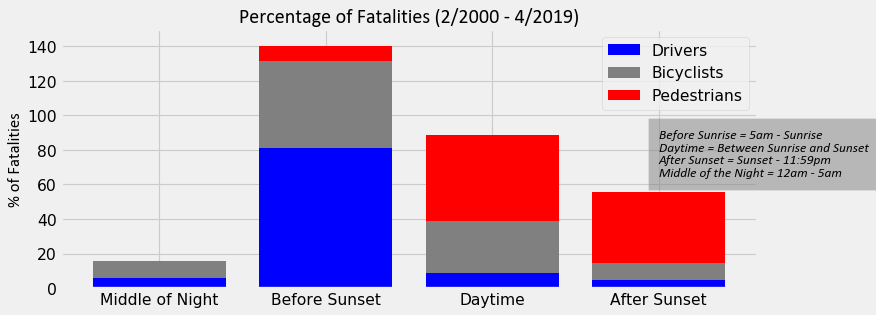

In [109]:
plt.figure(figsize=(10, 4), dpi=80)
x = ["Middle of Night", "Before Sunset", "Daytime", "After Sunset"]
plt.bar(x, perc_fatal_driver_accidents, color='blue', label="Drivers")  # bottom
plt.bar(x, perc_fatal_bicycle_accidents, bottom = perc_fatal_driver_accidents, color='grey', label="Bicyclists") # middle

middle_bar_height = np.add(perc_fatal_driver_accidents, perc_fatal_bicycle_accidents).tolist()

plt.bar(x, perc_fatal_ped_accidents, bottom = middle_bar_height, color='red', label="Pedestrians") # top
plt.ylim(0, 150)
plt.ylabel("% of Fatalities", fontsize=15, fontname='Calibri')

month_portion_maxdate = int(maxdate[5:7])
year_portion_maxdate = maxdate[0:4]

month_portion_mindate = int(mindate[5:7])
year_portion_mindate = mindate[0:4]

plt.text(3, 64.6, 'Before Sunrise = 5am - Sunrise\nDaytime = Between Sunrise and Sunset\nAfter Sunset = Sunset - 11:59pm\nMiddle of the Night = 12am - 5am', style='italic',
    fontsize=12, fontname='Calibri', bbox={'facecolor':'grey', 'alpha':0.5, 'pad':10})

plt.title(f"Percentage of Fatalities ({month_portion_mindate}/{year_portion_mindate} - {month_portion_maxdate}/{year_portion_maxdate})",fontsize=18, fontname='Calibri')
plt.legend()
plt.savefig("Percentage of Fatalities")        
plt.show()

In [89]:
combined_df = pd.DataFrame({
    "Drivers": round(perc_fatal_driver_accidents),
    "Bicyclists": round(perc_fatal_bicycle_accidents),
    "Pedestrians": round(perc_fatal_ped_accidents)
})
combined_df

,Drivers,Bicyclists,Pedestrians
Time Frame,,,
1) Middle of Night,6.0,10.0,0.0
2) Before Sunrise,81.0,50.0,9.0
3) Daytime,9.0,30.0,50.0
4) After Sunset,4.0,10.0,41.0


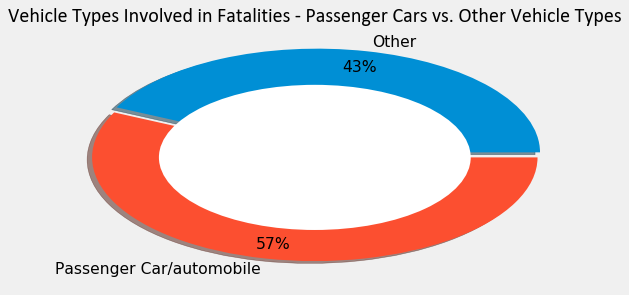

In [26]:
cars_and_others = merged_data.copy(deep=True)
cars_and_others = cars_and_others[cars_and_others['FATAL_DRIVER'] > 0]
cars_and_others.loc[cars_and_others['INVEHICLETYPE'] != 'Passenger Car/automobile', 'INVEHICLETYPE'] = 'Other'

vehicle_type_driver_fatalities = cars_and_others.groupby('INVEHICLETYPE').FATAL.count().reset_index()
labels = vehicle_type_driver_fatalities['INVEHICLETYPE']

plt.figure(figsize=(8, 4), dpi=80)
plt.title("Vehicle Types Involved in Fatalities - Passenger Cars vs. Other Vehicle Types", fontsize=18, fontname='Calibri')
plt.pie(vehicle_type_driver_fatalities['FATAL'], labels=labels, autopct='%1.0f%%', pctdistance=0.85, shadow=True, explode = [.05, 0])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

                 INVEHICLETYPE  FATAL
0                    Cargo Van      9
1             Drugs/ Narcotics      9
2                     Firearms      8
3                  Motor Cycle     29
4                Other Vehicle     58
5                Passenger Van     23
6                 Pickup Truck     11
7  Suv (sport Utility Vehicle)     29


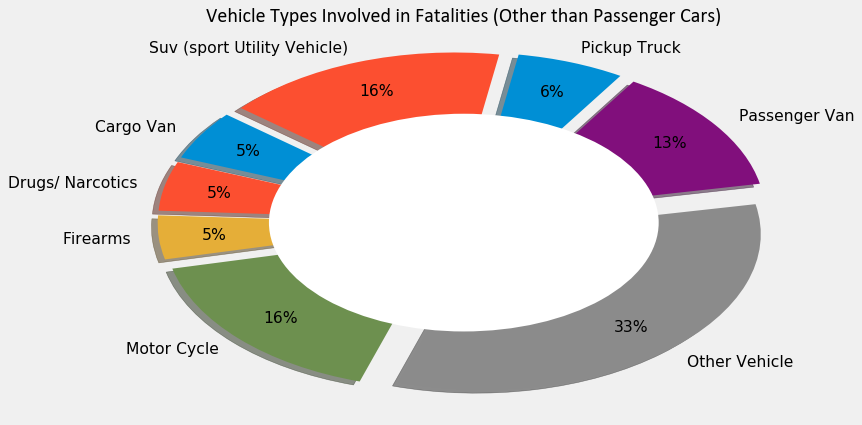

In [27]:
others_df = merged_data.copy(deep=True)
others_df["INVEHICLETYPE"] = others_df["INVEHICLETYPE"].replace(
    {"Atv (all Terrain Vehicle)": "Other Vehicle", "Bus": "Other Vehicle", "Large/heavy Truck": "Other Vehicle",
    "Moped/scooter": "Other Vehicle", "None": "Other Vehicle", "Other Small/light Truck": "Other Vehicle",
    "Trailer": "Other Vehicle"})

others_df_groupby = others_df[(others_df['FATAL_DRIVER'] > 0) & 
                              (others_df['INVEHICLETYPE'] != 'Passenger Car/automobile')].groupby('INVEHICLETYPE')
vehicles = others_df_groupby.FATAL.count().reset_index()
print(vehicles)
labels = vehicles['INVEHICLETYPE']
labels

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Vehicle Types Involved in Fatalities (Other than Passenger Cars)", fontsize=18, fontname='Calibri')
explode = [.1, .1, .1, .1, .1, .1, .1, .1]
plt.pie(vehicles['FATAL'], labels=labels, autopct='%1.0f%%', shadow=True, explode = explode, pctdistance=0.8, startangle=140)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Vehicle Types - Other")
plt.show()

In [90]:
injuries = fatalities_injuries_filter[(fatalities_injuries_filter['MAJORINJURIES_DRIVER']!= 0) | 
                                      (fatalities_injuries_filter['MINORINJURIES_DRIVER']!= 0) |
                                      (fatalities_injuries_filter['FATAL_DRIVER']!= 0) |
                                      (fatalities_injuries_filter['MAJORINJURIES_BICYCLIST']!= 0) | 
                                      (fatalities_injuries_filter['MINORINJURIES_BICYCLIST']!= 0) |
                                      (fatalities_injuries_filter['FATAL_BICYCLIST']!= 0) |
                                      (fatalities_injuries_filter['MINORINJURIES_PEDESTRIAN']!= 0) |
                                      (fatalities_injuries_filter['MINORINJURIES_PEDESTRIAN']!= 0) |
                                      (fatalities_injuries_filter['FATAL_PEDESTRIAN']!= 0)].reset_index()
injuries.head()

,index,REPORTDATE,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FATAL,MAJORINJURY,MINORINJURY,MAJORINJURIES_BICYCLIST,MAJORINJURIES_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_BICYCLIST,MINORINJURIES_DRIVER,MINORINJURIES_PEDESTRIAN,Sunrise,Sunset,Accident Time,Time Frame,Time Frame Label
0,11,2017-03-31T03:53:04.000Z,0,0,0,N,N,N,0,0,0,0,0,1,655,1931,353,1) Middle of Night,Midnight -> 5am
1,12,2017-03-31T03:53:04.000Z,0,0,0,N,N,Y,0,0,0,0,0,1,655,1931,353,1) Middle of Night,Midnight -> 5am
2,22,2013-11-09T05:00:00.000Z,0,0,0,N,N,Y,0,0,0,0,1,0,644,1700,500,2) Before Sunrise,5am -> Sunrise
3,23,2013-11-09T05:00:00.000Z,0,0,0,N,N,N,0,0,0,0,1,0,644,1700,500,2) Before Sunrise,5am -> Sunrise
4,45,2014-10-16T05:00:00.000Z,0,0,0,N,N,N,0,0,0,0,1,0,718,1829,500,2) Before Sunrise,5am -> Sunrise


In [106]:
maxdate = injuries['REPORTDATE'].max()
print(maxdate)

mindate = injuries['REPORTDATE'].min()
print(mindate)

month_portion_maxdate = int(maxdate[5:7])
year_portion_maxdate = maxdate[0:4]

month_portion_mindate = int(mindate[5:7])
year_portion_mindate = mindate[0:4]

2019-04-16T02:29:22.000Z
2000-02-11T05:00:00.000Z


In [119]:
x = [0, 1, 2, 3]
labels = ["Middle of Night", "Before Sunset", "Daytime", "After Sunset"]

total_major_injuries = injuries.MAJORINJURIES_DRIVER.sum()
major_driver_injuries = (injuries.groupby('Time Frame').MAJORINJURIES_DRIVER.sum() / total_major_injuries) * 100

total_minor_injuries = injuries.MINORINJURIES_DRIVER.sum()
minor_driver_injuries = (injuries.groupby('Time Frame').MINORINJURIES_DRIVER.sum() / total_minor_injuries) * 100

total_fatalities = injuries.FATAL_DRIVER.sum()
fatality_injuries = (injuries.groupby('Time Frame').FATAL_DRIVER.sum() / total_fatalities) * 100
print(fatality_injuries)

Time Frame
1) Middle of Night     5.633803
2) Before Sunrise     81.220657
3) Daytime             8.685446
4) After Sunset        4.460094
Name: FATAL_DRIVER, dtype: float64


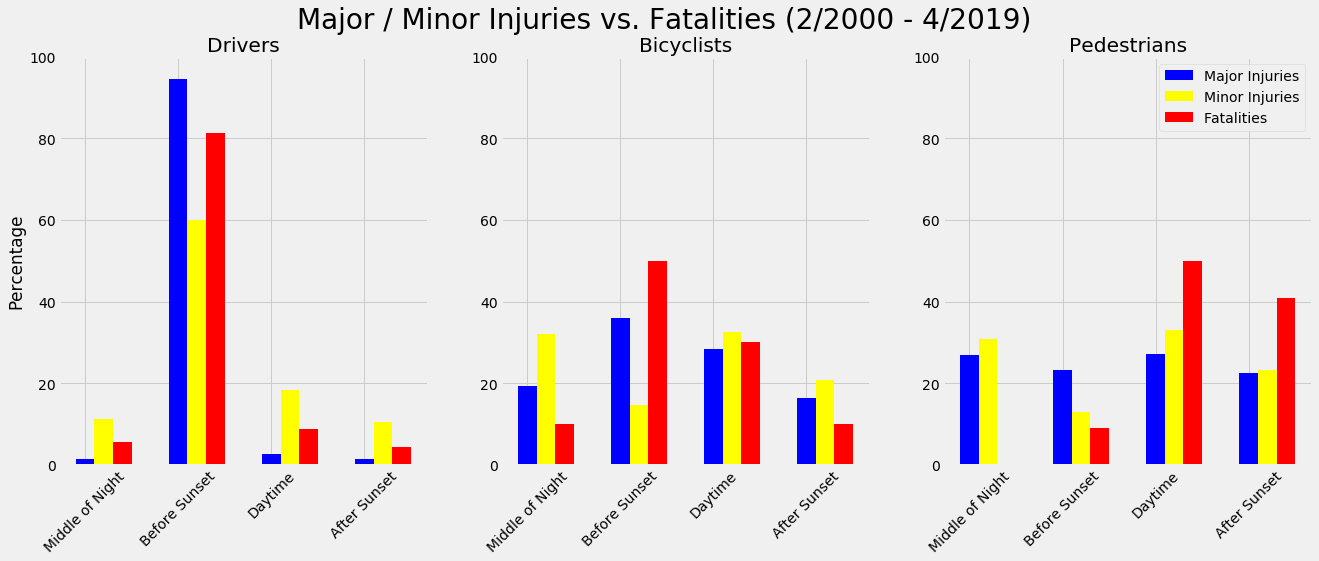

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle(f"Major / Minor Injuries vs. Fatalities ({month_portion_mindate}/{year_portion_mindate} - {month_portion_maxdate}/{year_portion_maxdate})", fontsize = 28)
plt.setp(axs, xticks=[0, 1, 2, 3], xticklabels=["Middle of Night", "Before Sunset", "Daytime", "After Sunset"])

axs[0].bar(list(np.arange(0, 4)), major_driver_injuries, width=0.2, label="Major Injuries", color = "blue")
axs[0].bar(list(np.arange(0.2, 4.2)), minor_driver_injuries, width = 0.2, label="Minor Injuries", color="yellow")
axs[0].bar(list(np.arange(0.4, 4.4)), fatality_injuries, width = 0.2, label="Fatalities", color="red")
axs[0].set_title("Drivers")
axs[0].set_ylabel("Percentage")
axs[0].set_ylim(0, 100)
axs[0].set_xticklabels(labels, rotation=45)

total_major_injuries = injuries.MAJORINJURIES_BICYCLIST.sum()
major_BICYCLIST_injuries = (injuries.groupby('Time Frame').MAJORINJURIES_BICYCLIST.sum() / total_major_injuries) * 100
total_minor_injuries = injuries.MINORINJURIES_BICYCLIST.sum()
minor_BICYCLIST_injuries = (injuries.groupby('Time Frame').MINORINJURIES_BICYCLIST.sum() / total_minor_injuries) * 100
total_fatalities = injuries.FATAL_BICYCLIST.sum()
fatality_injuries = (injuries.groupby('Time Frame').FATAL_BICYCLIST.sum() / total_fatalities) * 100

axs[1].bar(list(np.arange(0, 4)), major_BICYCLIST_injuries, width=0.2, label="Major Injuries", color = "blue")
axs[1].bar(list(np.arange(0.2, 4.2)), minor_BICYCLIST_injuries, width = 0.2, label="Minor Injuries", color="yellow")
axs[1].bar(list(np.arange(0.4, 4.4)), fatality_injuries, width = 0.2, label="Fatalities", color="red")
axs[1].set_title("Bicyclists")
axs[1].set_ylim(0, 100)
axs[1].set_xticklabels(labels, rotation=45)

total_major_injuries = injuries.MAJORINJURIES_PEDESTRIAN.sum()
major_PEDESTRIAN_injuries = (injuries.groupby('Time Frame').MAJORINJURIES_PEDESTRIAN.sum() / total_major_injuries) * 100
total_minor_injuries = injuries.MINORINJURIES_PEDESTRIAN.sum()
minor_PEDESTRIAN_injuries = (injuries.groupby('Time Frame').MINORINJURIES_PEDESTRIAN.sum() / total_minor_injuries) * 100
total_fatalities = injuries.FATAL_PEDESTRIAN.sum()
fatality_injuries = (injuries.groupby('Time Frame').FATAL_PEDESTRIAN.sum() / total_fatalities) * 100

axs[2].bar(list(np.arange(0, 4)), major_PEDESTRIAN_injuries, width=0.2, label="Major Injuries", color = "blue")
axs[2].bar(list(np.arange(0.2, 4.2)), minor_PEDESTRIAN_injuries, width = 0.2, label="Minor Injuries", color="yellow")
axs[2].bar(list(np.arange(0.4, 4.4)), fatality_injuries, width = 0.2, label="Fatalities", color="red")
axs[2].set_title("Pedestrians")
axs[2].set_ylim(0, 100)
axs[2].set_xticklabels(labels, rotation=45)
axs[2].legend()
plt.savefig("Minor Major Injuries vs Fatalities")
plt.show()